In [14]:
import pandas as pd
import numpy as np

file_path = "./Data.csv"

data = []
data = pd.read_csv(file_path) # Reading Initial Data
data.head()

,AGE,GENDER,BTHUS,CTZDUAL,CTZUSIN,BSDGN,MRDGRUS,MARIND,LFSTAT,EDDAD_1,...,FACSAL_1,FACSAL_2,FACSAL_3,FACSAL_4,FACSAL_L,FACSEC_1,FACSEC_2,FACSEC_3,FACSEC_4,FACSEC_L
0,40.0,False,True,False,True,3.0,True,True,True,0,...,1,0,0,0,0,1,0,0,0,0
1,40.0,True,True,False,True,2.0,True,True,True,0,...,1,0,0,0,0,1,0,0,0,0
2,34.0,True,True,False,True,2.0,True,True,True,0,...,1,0,0,0,0,1,0,0,0,0
3,46.0,False,True,False,True,1.0,True,False,True,0,...,0,1,0,0,0,0,1,0,0,0
4,32.0,True,True,False,True,2.0,True,True,True,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
# Selecting our preference variables 
jvar = ['AGE', 'GENDER','CTZUSIN', 'BSDGN', 'MARIND','VETSTAT_0', 'VETSTAT_1', 'VETSTAT_2', 'VETSTAT_3',
    'RACEM_1', 'RACEM_2', 'RACEM_3', 'RACEM_4', 'RACEM_5', 'RACEM_6', 'LFSTAT',
    'BACARN_0', 'BACARN_11', 'BACARN_12', 'BACARN_13', 'BACARN_14', 'BACARN_21', 'BACARN_22', 'BACARN_31', 'BACARN_32', 'BACARN_40', 'BACARN_51', 'BACARN_52', 'BACARN_53', 'BACARN_54', 'BACARN_56', 'BACARN_59', 'BACARN_60',
    'DGRDG_1', 'DGRDG_2', 'DGRDG_3', 'DGRDG_4'] #variables which show job preferences
data = data[jvar]
data.head()

,AGE,GENDER,CTZUSIN,BSDGN,MARIND,VETSTAT_0,VETSTAT_1,VETSTAT_2,VETSTAT_3,RACEM_1,...,BACARN_52,BACARN_53,BACARN_54,BACARN_56,BACARN_59,BACARN_60,DGRDG_1,DGRDG_2,DGRDG_3,DGRDG_4
0,40.0,False,True,3.0,True,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,40.0,True,True,2.0,True,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,34.0,True,True,2.0,True,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,46.0,False,True,1.0,False,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,32.0,True,True,2.0,True,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
missing_values_count = data.isna().sum()

# Print the count of missing values for each column
print(missing_values_count)

AGE          0
GENDER       0
CTZUSIN      0
BSDGN        0
MARIND       0
VETSTAT_0    0
VETSTAT_1    0
VETSTAT_2    0
VETSTAT_3    0
RACEM_1      0
RACEM_2      0
RACEM_3      0
RACEM_4      0
RACEM_5      0
RACEM_6      0
LFSTAT       0
BACARN_0     0
BACARN_11    0
BACARN_12    0
BACARN_13    0
BACARN_14    0
BACARN_21    0
BACARN_22    0
BACARN_31    0
BACARN_32    0
BACARN_40    0
BACARN_51    0
BACARN_52    0
BACARN_53    0
BACARN_54    0
BACARN_56    0
BACARN_59    0
BACARN_60    0
DGRDG_1      0
DGRDG_2      0
DGRDG_3      0
DGRDG_4      0
dtype: int64


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Logistic Regression functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [19]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


In [20]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)  # Compute activation
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # Compute cost

    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    grads = {"dw": dw, "db": db}
    return grads, cost

In [21]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs


In [23]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)
    Y_prediction = (A > 0.5).astype(int)
    return Y_prediction

In [27]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")

    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    return d


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
# Assume 'LFSTAT' is the target variable and needs to be predicted
X = data.drop('LFSTAT', axis=1)
y = data['LFSTAT']

# Normalize features (optional, but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transpose matrices to fit model format (features as rows)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.values.reshape(1, -1)
y_test = y_test.values.reshape(1, -1)

In [31]:
# Assuming the model and other functions are already defined as provided earlier
num_iterations = 10000
learning_rate = 0.005
print_cost = True

results = model(X_train, y_train, X_test, y_test, num_iterations, learning_rate, print_cost)


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5986859594272336
Cost after iteration 200: 0.5249241809619996
Cost after iteration 300: 0.4669082426431559
Cost after iteration 400: 0.420831206307983
Cost after iteration 500: 0.383836945061162
Cost after iteration 600: 0.3538031293401883
Cost after iteration 700: 0.32915388820789776
Cost after iteration 800: 0.3087137913741796
Cost after iteration 900: 0.2915994233616949
Cost after iteration 1000: 0.277140687270138
Cost after iteration 1100: 0.26482419505754734
Cost after iteration 1200: 0.25425258631825576
Cost after iteration 1300: 0.24511518628872023
Cost after iteration 1400: 0.2371667064204408
Cost after iteration 1500: 0.23021165932565532
Cost after iteration 1600: 0.22409285418166847
Cost after iteration 1700: 0.21868282604028072
Cost after iteration 1800: 0.21387739157869748
Cost after iteration 1900: 0.20959075930537263
Cost after iteration 2000: 0.20575178612663503
Cost after iteration 2100: 0.2023010867

Training Accuracy: [[1 1 1 ... 1 1 1]]
Test Accuracy: [[1 1 1 ... 1 1 1]]


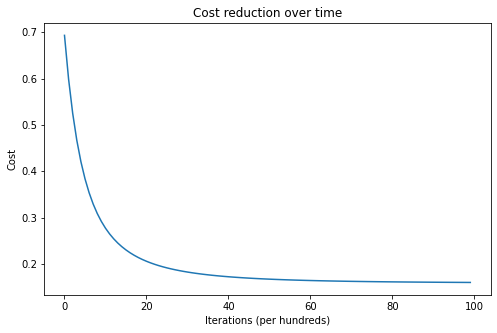

In [32]:
# Print the accuracies
print("Training Accuracy:", results['Y_prediction_train'])
print("Test Accuracy:", results['Y_prediction_test'])

# Plotting the cost
import matplotlib.pyplot as plt

costs = np.squeeze(results['costs'])
plt.figure(figsize=(8, 5))
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()
